### Задача 1. Минимизация гладкой функции

Нужно найти минимум той же функции $f(x) = \sin(\frac{x}{5})\;  \exp(\frac{x}{10})\; + 5  \exp(\frac{-x}{2})$, уже на отрезке \[1, 30\] силами модулей библиотеки <code>scipy</code>.

<img src="graph.jpg" width=400 align="left"/>

In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)

graph_x = np.arange(1, 30, 0.1)
graph_y = [f(i) for i in graph_x]

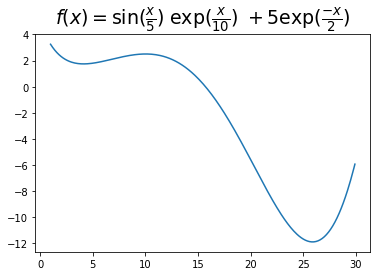

In [3]:
plt.plot(graph_x, graph_y)
plt.title(r"$f(x) = \sin(\frac{x}{5})\;  \exp(\frac{x}{10})\; + 5  \exp(\frac{-x}{2})$", fontsize=19)
plt.show()

Поиск минимума на стандартных параметрах:

In [4]:
min_default = minimize(f, 2)
ans_1 = round(min_default.fun, 2)

min_default

      fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])

и с методом BFGS:

In [5]:
min_bfgs = minimize(f, 30, method="BFGS")
ans_2 = round(min_bfgs.fun, 2)

min_bfgs

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

Функция с одинаковой точностью в обоих случаях находит минимумы в 1.75 и -11.9.

---

### Задача 2. Глобальная оптимизация

In [6]:
from scipy.optimize import differential_evolution

In [7]:
min_difev = differential_evolution(f, [(1, 30),])
ans_3 = round(min_difev.fun[0], 2)

min_difev

     fun: array([-11.89889467])
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 83
     nit: 4
 success: True
       x: array([25.88019338])

Итераций больше, но ответ получается с первого раза.

---

### Задача 3. Минимизация негладкой функции

Вводим негладкую функцию на основе оригинальной $f(x)$:

In [8]:
def h(x) ->int:
    return int(f(x))

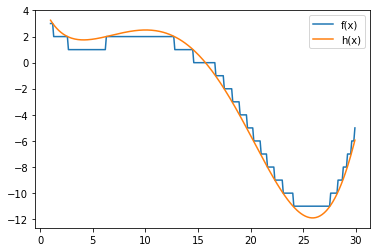

In [9]:
staircase_y = [h(i) for i in graph_x]

plt.plot(graph_x, staircase_y, graph_x, graph_y)
plt.legend(["f(x)", "h(x)"])
plt.show()

In [10]:
min_bfgs_step = minimize(h, 30, method="BFGS")
ans_4 = min_bfgs_step.fun

min_bfgs_step

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

BFGS не справляется с задачей и застревает.

In [11]:
min_difev_step = differential_evolution(h, [(1, 30),])
ans_5 = min_difev_step.fun

min_difev_step

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([26.30088194])

Глобальная оптимизация работает.

---

In [ ]:
#запись всех ответов
with open("submission-1.txt", "w+") as s:
    s.write(f"{ans_1} {ans_2}")
    
with open("submission-2.txt", "w+") as s:
    s.write(f"{ans_3}")
    
with open("submission-3.txt", "w+") as s:
    s.write(f"{ans_4} {ans_5}")